In [33]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

In [58]:
%matplotlib inline

In [2]:
headers = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=headers)

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
features = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
target = ['price']
numeric = ['price', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# Cleaning the dataset

In [5]:
cars['normalized-losses'].value_counts().head()

?      41
161    11
91      8
150     7
128     6
Name: normalized-losses, dtype: int64

In [6]:
cars = cars.replace('?', np.nan)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
cars['normalized-losses'] = cars['normalized-losses'].astype('float')
cars['bore'] = cars['bore'].astype('float')
cars['stroke'] = cars['stroke'].astype('float')
cars['horsepower'] = cars['horsepower'].astype('float')
cars['peak-rpm'] = cars['peak-rpm'].astype('float')
cars['price'] = cars['price'].astype('float')
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [8]:
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
# Remove normalized losses column because too many null values
cars = cars.drop(['normalized-losses'], axis=1)
cars.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [10]:
# Use mean values of columns to fill NaN values for certain columns
# The values of these two columns don't range that much
cars['stroke'] = cars['stroke'].fillna(cars['stroke'].mean())
cars['bore'] = cars['bore'].fillna(cars['bore'].mean())
cars.isnull().sum()

symboling           0
make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
fuel-system         0
bore                0
stroke              0
compression-rate    0
horsepower          2
peak-rpm            2
city-mpg            0
highway-mpg         0
price               4
dtype: int64

In [11]:
# Drop remaining columns with missing values
cars = cars.dropna()
cars.isnull().sum()

symboling           0
make                0
fuel-type           0
aspiration          0
num-of-doors        0
body-style          0
drive-wheels        0
engine-location     0
wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
fuel-system         0
bore                0
stroke              0
compression-rate    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

In [12]:
# Use numeric cars
num_cars = cars[numeric]
num_cars.head()

,price,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
0,13495.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,16500.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,16500.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,13950.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,17450.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22


In [13]:
# Normalize all columns except the target column on a 0-1 scale
# formula: norm = (df - df.min()) / (df.max() - df.min())
price_col = num_cars[target]
num_cars = (num_cars - num_cars.min()) / (num_cars.max() - num_cars.min())
num_cars[target] = price_col
num_cars.head()

,price,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
0,13495.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474
1,16500.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474
2,16500.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158
3,13950.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421
4,17450.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895


# Univariate KNN

In [19]:
def knn_train_test(train_col, target_col, k_val):
    kf = KFold(5, shuffle=True, random_state=27)
    knn = KNeighborsRegressor(n_neighbors=k_val)
    mses = cross_val_score(knn, train_col, target_col, scoring='neg_mean_squared_error', cv=kf)
    return np.sqrt(np.absolute(mses)).mean()

In [25]:
# Testing the RMSE for each column using a k value of 5
for f in features:
    print(f + ': ', knn_train_test(num_cars[[f]], num_cars[target], 5))

wheel-base:  5825.00065567
length:  4998.32384086
width:  4389.97210156
height:  7854.31580804
curb-weight:  4509.64408904
engine-size:  2980.1977597
bore:  6776.72228873
stroke:  7471.20897226
compression-rate:  6340.38563288
horsepower:  3700.90978449
peak-rpm:  7573.70589944
city-mpg:  4397.55512478
highway-mpg:  4502.39256556


In [64]:
# Testing the RMSE for each column using k values of 1, 3, 5, 7, 9
k_vals = [1, 3, 5, 7, 9]
k_rmse_values = {}
for f in features:
    rmses = {}
    for k in k_vals:
        rmses[k] = (knn_train_test(num_cars[[f]], num_cars[target], k))
    k_rmse_values[f] = rmses
    
k_rmse_values       

{'bore': {1: 8284.4942675957609,
  3: 6666.874678394287,
  5: 6776.7222887288617,
  7: 6800.3506972531222,
  9: 6767.6675140769821},
 'city-mpg': {1: 5751.7582499478176,
  3: 4608.7183742193647,
  5: 4397.5551247799613,
  7: 4692.7588328043885,
  9: 4685.8749089217908},
 'compression-rate': {1: 6473.6092862833229,
  3: 6008.9906707930941,
  5: 6340.3856328841539,
  7: 6417.8905937898953,
  9: 6525.8483928680134},
 'curb-weight': {1: 5307.094624304741,
  3: 4678.4943036827044,
  5: 4509.6440890433287,
  7: 4116.4045468656695,
  9: 4150.2355008180575},
 'engine-size': {1: 3659.8845141171978,
  3: 2866.128241897412,
  5: 2980.197759700347,
  7: 3380.7477010933349,
  9: 3420.8448479388012},
 'height': {1: 8735.6234889683219,
  3: 8080.4136151848752,
  5: 7854.3158080423691,
  7: 7804.1692326036882,
  9: 7836.5904910675163},
 'highway-mpg': {1: 5471.4759078322877,
  3: 4882.2369692599832,
  5: 4502.3925655648982,
  7: 4447.132235791225,
  9: 4328.226709936609},
 'horsepower': {1: 4051.25695

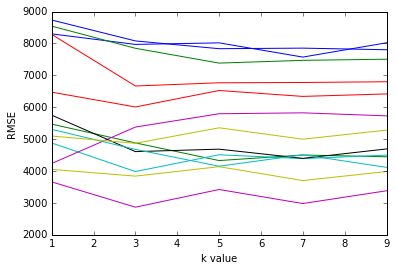

In [86]:
for key, rmses in k_rmse_values.items():
    x = k_vals
    y = list(rmses.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# Multivariate KNN

In [126]:
def knn_train_test(col_names, target_col_name, df, k_val):
    kf = KFold(5, shuffle=True, random_state=27)
    knn = KNeighborsRegressor(n_neighbors=k_val)
    mses = cross_val_score(knn, df[col_names], df[target_col_name], scoring='neg_mean_squared_error', cv=kf)
    return np.sqrt(np.absolute(mses)).mean()

In [79]:
# Best k values in each feature
best_k = {}
for f in features:
    d = k_rmse_values[f]
    best_k[f] = min(d, key=d.get)
best_k

{'bore': 3,
 'city-mpg': 5,
 'compression-rate': 3,
 'curb-weight': 7,
 'engine-size': 3,
 'height': 7,
 'highway-mpg': 9,
 'horsepower': 5,
 'length': 3,
 'peak-rpm': 5,
 'stroke': 9,
 'wheel-base': 1,
 'width': 3}

In [115]:
best_rmse_values = {}

for key, rmses in k_rmse_values.items():
    best_rmse_values[key] = rmses[best_k[key]]
    
best_rmses = pd.Series(best_rmse_values).sort_values()
best_ks = pd.Series(best_k)
print(best_rmses)
print(best_ks)

engine-size         2866.128242
horsepower          3700.909784
width               3983.655850
curb-weight         4116.404547
wheel-base          4236.983760
highway-mpg         4328.226710
city-mpg            4397.555125
length              4869.221135
compression-rate    6008.990671
bore                6666.874678
stroke              7385.315403
peak-rpm            7573.705899
height              7804.169233
dtype: float64
bore                3
city-mpg            5
compression-rate    3
curb-weight         7
engine-size         3
height              7
highway-mpg         9
horsepower          5
length              3
peak-rpm            5
stroke              9
wheel-base          1
width               3
dtype: int64


In [127]:
# Best 2 features
col_names = best_rmses[:2].index
k_value = int(best_ks[col_names].median())
knn_train_test(col_names, target, num_cars, k_value)

2911.3241214963318

In [129]:
# Best 3 features
col_names = best_rmses[:3].index
k_value = int(best_ks[col_names].median())
knn_train_test(col_names, target, num_cars, k_value)

2783.1628004834956

In [130]:
# Best 4 features
col_names = best_rmses[:4].index
k_value = int(best_ks[col_names].median())
knn_train_test(col_names, target, num_cars, k_value)

2876.2150979435437

In [131]:
# Best 5 features
col_names = best_rmses[:5].index
k_value = int(best_ks[col_names].median())
knn_train_test(col_names, target, num_cars, k_value)

3230.3148918769016

This k value still might not be optimal considering it is just the median of the best k values for each column

# Optimization of k in multivariate model

In [136]:
# Using result with lowest rmse from above
k_test = {}
for i in range(2,5):
    num_cols_k_test = {}
    col_names = best_rmses[:i].index
    for k in range(1,26):
        num_cols_k_test[k] = knn_train_test(col_names, target, num_cars, k)
    k_test[i] = num_cols_k_test
k_test

{2: {1: 3024.0615378831512,
  2: 2896.3063180253075,
  3: 2777.3488112969399,
  4: 2911.3241214963318,
  5: 2840.6798854493113,
  6: 2986.4813978556754,
  7: 3128.5926982158567,
  8: 3250.478730453754,
  9: 3380.0881717737029,
  10: 3514.7205473621675,
  11: 3655.4936056132196,
  12: 3746.104717002866,
  13: 3845.2984572196337,
  14: 3967.1303708028245,
  15: 4098.4159030011779,
  16: 4115.493482699203,
  17: 4168.4172539080828,
  18: 4211.8976584499387,
  19: 4238.1197034458246,
  20: 4303.8329807670989,
  21: 4387.0246556010879,
  22: 4451.7606819096218,
  23: 4519.3628540109212,
  24: 4565.8856210241129,
  25: 4609.5062012065991},
 3: {1: 2909.3146266239864,
  2: 2555.4569837812951,
  3: 2783.1628004834956,
  4: 2897.2469182378636,
  5: 3132.7395350211295,
  6: 3308.2005955901418,
  7: 3394.2496822948242,
  8: 3449.8989461180195,
  9: 3474.3456738732966,
  10: 3507.7761748327584,
  11: 3534.7129119804986,
  12: 3657.5473037040101,
  13: 3748.0470571025535,
  14: 3846.1676474819965,


The best k value is 2 using the top 4 columns: engine-size, horsepower, width, curb-weight.

In [ ]:


def knn_train_predict:
    col_names = ['engine-size', 'horsepower', 'width', 'curb-weight']
    kf = KFold(5, shuffle=True, random_state=27)
    knn = KNeighborsRegressor(n_neighbors=2)
    mses = cross_val_score(knn, num_cars[col_names], num_cars[['price']], scoring='neg_mean_squared_error', cv=kf)
    return np.sqrt(np.absolute(mses)).mean()